In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import save_model, load_model
import plotly.graph_objs as go
import plotly.offline as py

Epoch 1/100


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.2057 - val_loss: 0.0374
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0099 - val_loss: 0.0048
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.

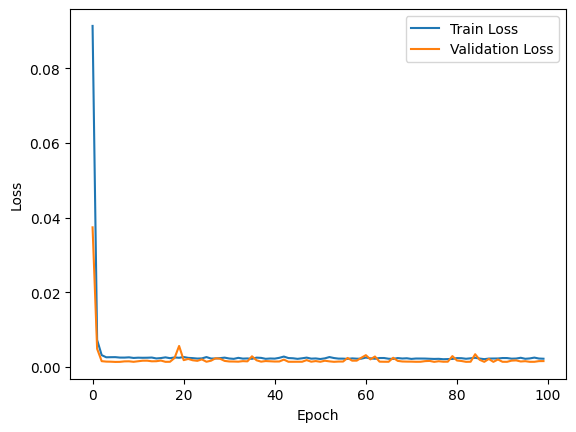

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Train RMSE: 0.11058759396547965
Test RMSE: 0.1182159340843337


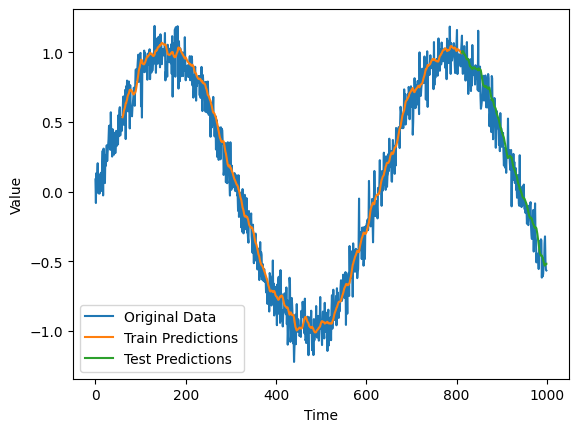

In [9]:


# Generate sample data (replace this with your actual data)
def generate_data(n):
    return np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 0.1, n)

# Create dataset
data = generate_data(1000)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Convert dataset into features and target
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Number of timesteps to look back
X, Y = create_dataset(data_scaled, look_back)

# Reshape input for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split dataset into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scaling
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Train RMSE:', train_score)
print('Test RMSE:', test_score)

# Plot results
plt.plot(data, label='Original Data')
plt.plot(np.arange(look_back, look_back+len(train_predict)), train_predict, label='Train Predictions')
plt.plot(np.arange(look_back+len(train_predict), len(data)), test_predict, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## Stock price prediction

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import yfinance as yf

# # Download AAPL stock price data from Yahoo Finance
# data = yf.download('AAPL', start='2010-01-01', end=datetime.today())
# data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378823,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600


In [26]:
# data.to_csv('AAPL_stocks.csv')
data= pd.read_csv('AAPL_stocks.csv')
data= data.set_index("Date")
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378823,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.0037 - val_loss: 9.1059e-04
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 8.0195e-05 - val_loss: 8.1537e-04
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 7.1321e-05 - val_loss: 9.1350e-04
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 6.9481e-05 - val_loss: 7.0098e-04
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 6.6468e-05 - val_loss: 7.5229e-04
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.3275e-05 - val_loss: 5.7600e-04
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 4.5430e-05 - val_loss: 6.3503e-04
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 6.0905e-05 - val_loss: 0.0011
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 5.1792e-05 - val_loss: 7.0896e-04
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.9985e-05 - val_loss: 5.8845e-04
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 4.072

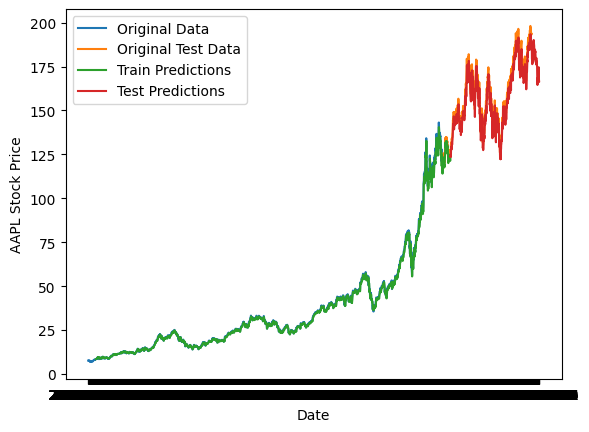

In [25]:
# Extract the 'Close' prices as the target variable
data = data[['Close']]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create dataset function
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare data for LSTM
look_back = 60  # Number of timesteps to look back
X, Y = create_dataset(data_scaled, look_back)

# Reshape input for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split dataset into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse scaling
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate RMSE
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Train RMSE:', train_score)
print('Test RMSE:', test_score)

# Plot results
plt.plot(data.index[:len(train_predict)], data[:len(train_predict)], label='Original Data')
plt.plot(data.index[len(train_predict):len(train_predict)+len(test_predict)], data[len(train_predict):len(train_predict)+len(test_predict)], label='Original Test Data')
plt.plot(data.index[look_back:look_back+len(train_predict)], train_predict, label='Train Predictions')
plt.plot(data.index[look_back+len(train_predict):], test_predict, label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()


### Saving Models

Epoch 1/100


c:\Users\zeesh\anaconda3\envs\forecasting_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0034 - val_loss: 8.5429e-04
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.2652e-05 - val_loss: 7.3575e-04
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 6.7073e-05 - val_loss: 8.5225e-04
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 5.5744e-05 - val_loss: 8.3195e-04
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 6.9529e-05 - val_loss: 0.0011
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.7092e-05 - val_loss: 8.2474e-04
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.5175e-05 - val_loss: 0.0016
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 4.8899e-05 - val_loss: 0.0011
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.6206e-05 - val_loss: 7.8926e-04
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.9121e-05 - val_loss: 0.0010
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.9281e-05 - val_loss: 7.4632e

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Loaded Model Train RMSE: 47.79003136638624
Loaded Model Test RMSE: 158.16313015255895


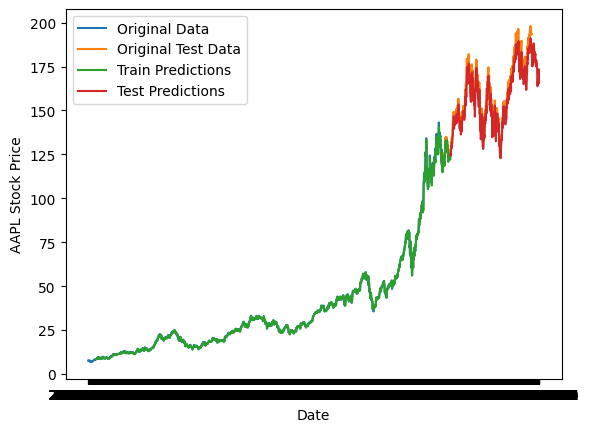

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import save_model, load_model



# Load your data
# data.to_csv('AAPL_stocks.csv')
data= pd.read_csv('AAPL_stocks.csv')
data= data.set_index("Date")
# data.head()

# Extract the 'Close' prices as the target variable
data = data[['Close']]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create dataset function
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare data for LSTM
look_back = 60  # Number of timesteps to look back
X, Y = create_dataset(data_scaled, look_back)

# Reshape input for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split dataset into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)


# Save the model
model.save("lstm_model.h5")

# Load the model
loaded_model = load_model("lstm_model.h5")

# Make predictions using the loaded model
loaded_train_predict = loaded_model.predict(X_train)
loaded_test_predict = loaded_model.predict(X_test)

# Inverse scaling
loaded_train_predict = scaler.inverse_transform(loaded_train_predict)
loaded_test_predict = scaler.inverse_transform(loaded_test_predict)

# Calculate RMSE
loaded_train_score = np.sqrt(mean_squared_error(Y_train, loaded_train_predict[:,0]))
loaded_test_score = np.sqrt(mean_squared_error(Y_test, loaded_test_predict[:,0]))
print('Loaded Model Train RMSE:', loaded_train_score)
print('Loaded Model Test RMSE:', loaded_test_score)
### 1st: Method:----------------------------------------------------------------
# # Plot results
# plt.plot(data.index[:len(loaded_train_predict)], data[:len(loaded_train_predict)], label='Original Data')
# plt.plot(data.index[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)], data[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)], label='Original Test Data')
# plt.plot(data.index[look_back:look_back+len(loaded_train_predict)], loaded_train_predict, label='Train Predictions')
# plt.plot(data.index[look_back+len(loaded_train_predict):], loaded_test_predict, label='Test Predictions')
# plt.xlabel('Date')
# plt.ylabel('AAPL Stock Price')
# plt.legend()
# plt.show()

### 2nd: Method:----------------------------------------------------------------
# Plot Original Data
trace_original_data = go.Scatter(x=data.index[:len(loaded_train_predict)], y=data[:len(loaded_train_predict)].values.flatten(), mode='lines', name='Original Data')
trace_original_test_data = go.Scatter(x=data.index[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)], y=data[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)].values.flatten(), mode='lines', name='Original Test Data')

# Plot Predictions
trace_train_predictions = go.Scatter(x=data.index[look_back:look_back+len(loaded_train_predict)], y=loaded_train_predict.flatten(), mode='lines', name='Train Predictions')
trace_test_predictions = go.Scatter(x=data.index[look_back+len(loaded_train_predict):], y=loaded_test_predict.flatten(), mode='lines', name='Test Predictions')

# Layout
layout = go.Layout(title='AAPL Stock Price Prediction',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='AAPL Stock Price'),
                   legend=dict(x=0.1, y=1.1, orientation='h'))

# Create Figure
fig = go.Figure(data=[trace_original_data, trace_original_test_data, trace_train_predictions, trace_test_predictions], layout=layout)

# Plot
py.iplot(fig)

### Calling the Saved Deep Learning Model

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import save_model, load_model



# Load your data
# data.to_csv('AAPL_stocks.csv')
data= pd.read_csv('AAPL_stocks.csv')
data= data.set_index("Date")
# data.head()

# Extract the 'Close' prices as the target variable
data = data[['Close']]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create dataset function
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare data for LSTM
look_back = 60  # Number of timesteps to look back
X, Y = create_dataset(data_scaled, look_back)

# Reshape input for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split dataset into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]




# Load the model
loaded_model = load_model("lstm_model.h5")

# Make predictions using the loaded model
loaded_train_predict = loaded_model.predict(X_train)
loaded_test_predict = loaded_model.predict(X_test)

# Inverse scaling
loaded_train_predict = scaler.inverse_transform(loaded_train_predict)
loaded_test_predict = scaler.inverse_transform(loaded_test_predict)

# Calculate RMSE
loaded_train_score = np.sqrt(mean_squared_error(Y_train, loaded_train_predict[:,0]))
loaded_test_score = np.sqrt(mean_squared_error(Y_test, loaded_test_predict[:,0]))
print('Loaded Model Train RMSE:', loaded_train_score)
print('Loaded Model Test RMSE:', loaded_test_score)
### 1st: Method:----------------------------------------------------------------
# # Plot results
# plt.plot(data.index[:len(loaded_train_predict)], data[:len(loaded_train_predict)], label='Original Data')
# plt.plot(data.index[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)], data[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)], label='Original Test Data')
# plt.plot(data.index[look_back:look_back+len(loaded_train_predict)], loaded_train_predict, label='Train Predictions')
# plt.plot(data.index[look_back+len(loaded_train_predict):], loaded_test_predict, label='Test Predictions')
# plt.xlabel('Date')
# plt.ylabel('AAPL Stock Price')
# plt.legend()
# plt.show()

### 2nd: Method:----------------------------------------------------------------
# Plot Original Data
trace_original_data = go.Scatter(x=data.index[:len(loaded_train_predict)], y=data[:len(loaded_train_predict)].values.flatten(), mode='lines', name='Original Data')
trace_original_test_data = go.Scatter(x=data.index[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)], y=data[len(loaded_train_predict):len(loaded_train_predict)+len(loaded_test_predict)].values.flatten(), mode='lines', name='Original Test Data')

# Plot Predictions
trace_train_predictions = go.Scatter(x=data.index[look_back:look_back+len(loaded_train_predict)], y=loaded_train_predict.flatten(), mode='lines', name='Train Predictions')
trace_test_predictions = go.Scatter(x=data.index[look_back+len(loaded_train_predict):], y=loaded_test_predict.flatten(), mode='lines', name='Test Predictions')

# Layout
layout = go.Layout(title='AAPL Stock Price Prediction',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='AAPL Stock Price'),
                   legend=dict(x=0.1, y=1.1, orientation='h'))

# Create Figure
fig = go.Figure(data=[trace_original_data, trace_original_test_data, trace_train_predictions, trace_test_predictions], layout=layout)

# Plot
py.iplot(fig)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Loaded Model Train RMSE: 47.79003136638624
Loaded Model Test RMSE: 158.16313015255895
